Momentum trading
Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt


Fetch Historical Stock Data

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000
2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000
2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000
2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000
2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000


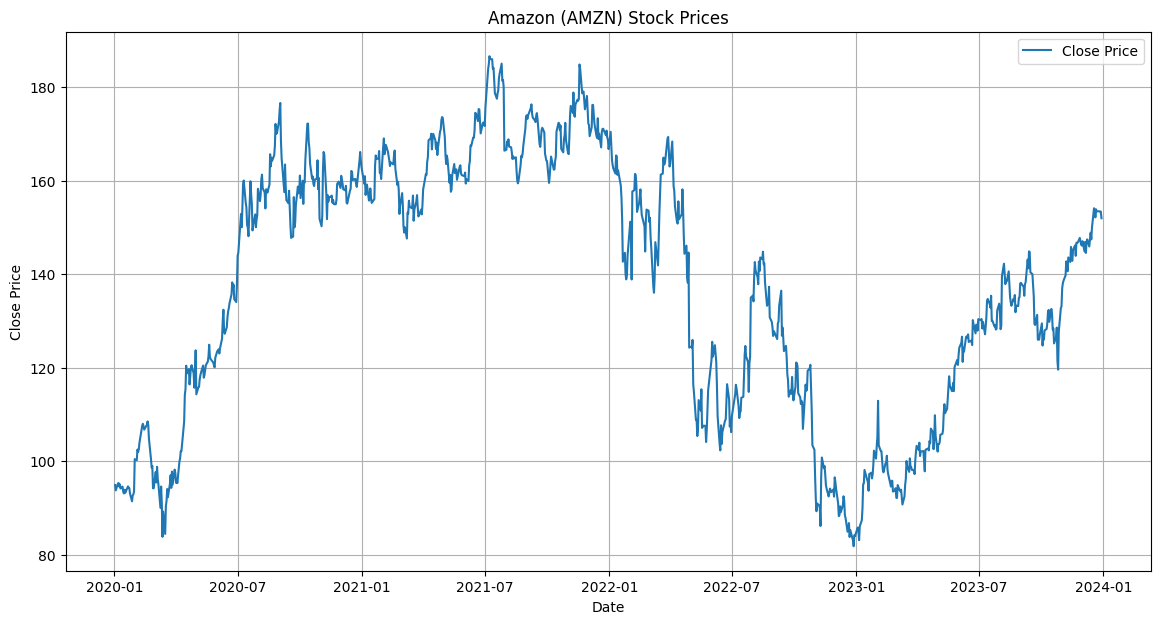

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data with yfinance
data = yf.download('AMZN', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the data
print(data.head())

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title('Amazon (AMZN) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


4. Implement Momentum Strategy

In [4]:
# Calculate MACD and Signal Line
short_window = 12
long_window = 26
signal_window = 9

# Compute short and long EMA
data['EMA12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=long_window, adjust=False).mean()

# Calculate MACD Line and Signal Line
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

# Generate buy/sell signals
data['Buy_Signal'] = np.where((data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) < data['Signal_Line'].shift(1)), 1, 0)
data['Sell_Signal'] = np.where((data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) > data['Signal_Line'].shift(1)), 1, 0)

# Display the first few rows with indicators
print(data[['Close', 'MACD', 'Signal_Line', 'Buy_Signal', 'Sell_Signal']].head())


                Close      MACD  Signal_Line  Buy_Signal  Sell_Signal
Date                                                                 
2020-01-02  94.900497  0.000000     0.000000           0            0
2020-01-03  93.748497 -0.091897    -0.018379           0            0
2020-01-06  95.143997 -0.051528    -0.025009           0            0
2020-01-07  95.343002 -0.003437    -0.020695           1            0
2020-01-08  94.598503 -0.025110    -0.021578           0            1


5. Visualize the Strategy

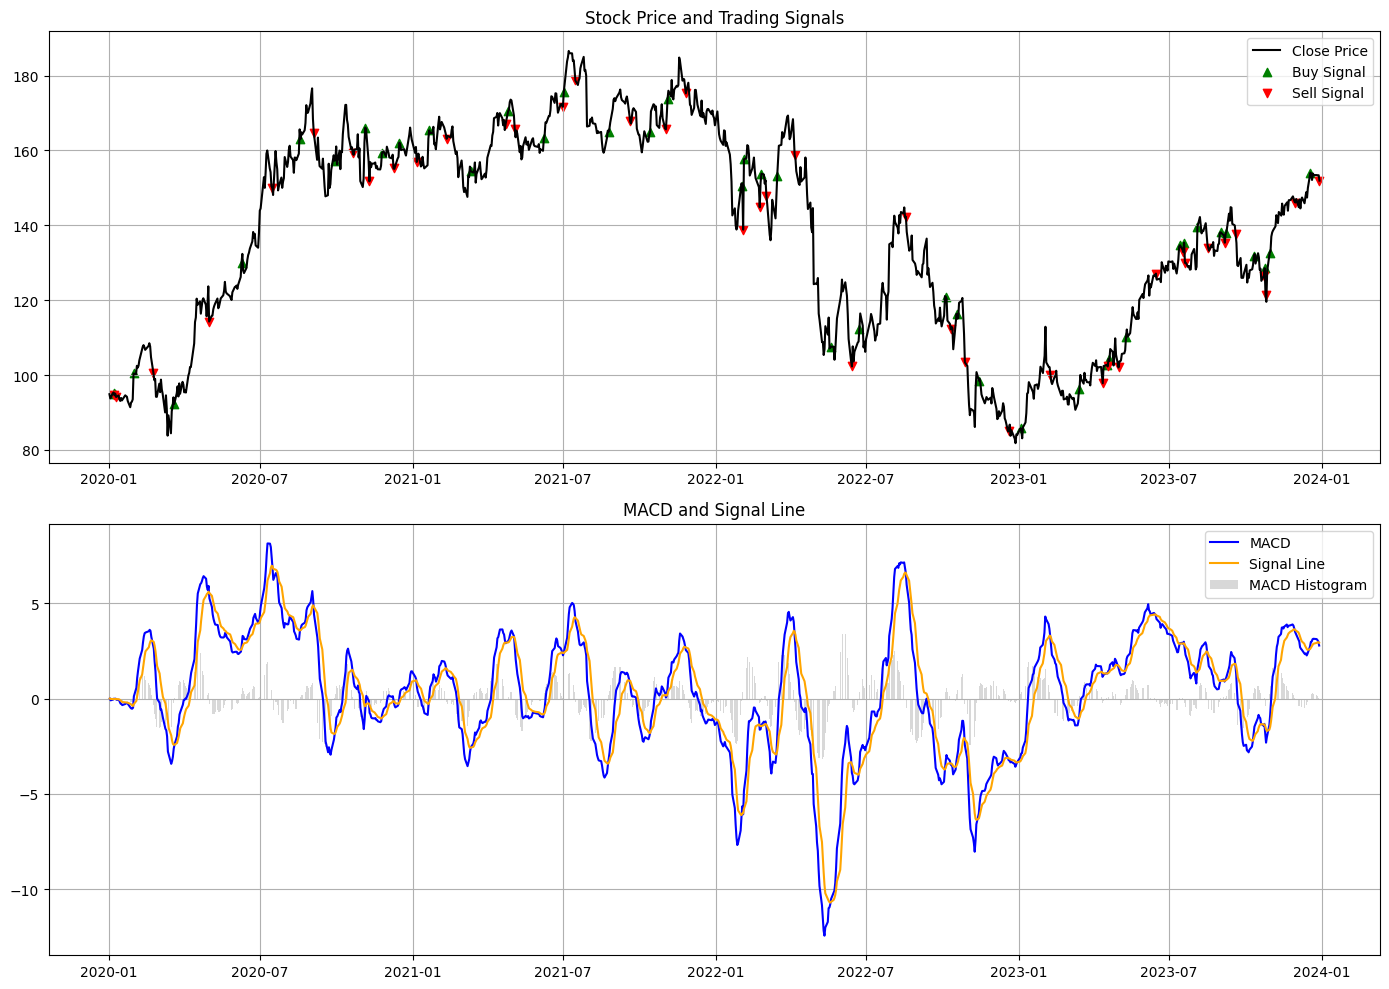

In [5]:
plt.figure(figsize=(14, 10))

# Plot the closing price and buy/sell signals
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.scatter(data.index[data['Buy_Signal'] == 1], data['Close'][data['Buy_Signal'] == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(data.index[data['Sell_Signal'] == 1], data['Close'][data['Sell_Signal'] == 1], marker='v', color='r', label='Sell Signal', alpha=1)
plt.title('Stock Price and Trading Signals')
plt.legend()
plt.grid(True)

# Plot the MACD and Signal Line
plt.subplot(2, 1, 2)
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['Signal_Line'], label='Signal Line', color='orange')
plt.bar(data.index, data['MACD'] - data['Signal_Line'], color='grey', alpha=0.3, label='MACD Histogram')
plt.title('MACD and Signal Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
